In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

data = pd.read_csv("clothes-size.csv")
data


,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [137]:
data.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [138]:
data[data["age"].isnull()]

,weight,age,height,size
402,64,NaN,172.72,M
749,56,NaN,165.10,L
1252,63,NaN,167.64,L
1519,56,NaN,157.48,S
1713,68,NaN,170.18,XL
...,...,...,...,...
117757,52,NaN,162.56,XXS
117911,63,NaN,175.26,M
118246,58,NaN,157.48,M
118594,63,NaN,162.56,M


In [107]:
data[data["height"].isnull()]

,weight,age,height,size
568,68,28.0,NaN,XL
983,59,28.0,NaN,M
1007,86,27.0,NaN,XXXL
1525,68,31.0,NaN,XXXL
1820,61,29.0,NaN,L
...,...,...,...,...
117772,54,26.0,NaN,XL
117870,70,34.0,NaN,XXXL
118037,47,30.0,NaN,XXS
118607,68,33.0,NaN,XXXL


In [90]:
data["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

In [113]:
data[data["size"]=="XXL"].count()

weight    69
age       69
height    69
size      69
dtype: int64

In [111]:
data[data["size"]=="XXL"].value_counts()

weight  age   height  size
63      29.0  154.94  XXL     2
68      40.0  162.56  XXL     2
53      37.0  160.02  XXL     1
68      45.0  160.02  XXL     1
70      18.0  162.56  XXL     1
                             ..
65      36.0  157.48  XXL     1
        42.0  162.56  XXL     1
        60.0  160.02  XXL     1
66      31.0  152.40  XXL     1
79      38.0  157.48  XXL     1
Length: 67, dtype: int64

In [128]:
data[data["size"] == "XXL"].isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [127]:
data["age"] = data["age"].replace(0, np.nan)
data["age"] = data["age"].fillna(data["age"].median())

In [139]:
# data["height"] = data["height"].replace(0, np.nan)
# data["height"] = data["height"].fillna(data["height"].median())
# Since we have a lot of data we can safely drop records with null values
data.dropna(inplace=True)
data.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [140]:
# Reseting the Index
data.reset_index(drop=True, inplace=True)

In [9]:
data_step_one = data.copy()
data_step_one

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [144]:
print("Rows befor removing XXL size",len(data_step_one))
data_step_one= data_step_one[data_step_one["size"]!="XXL"]
print("Rows befor after XXL size",len(data_step_one))
data_step_one

# data_step_one[data_step_one["size"]=="XXL"]

Rows befor removing XXL size 119084
Rows befor after XXL size 119084


,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


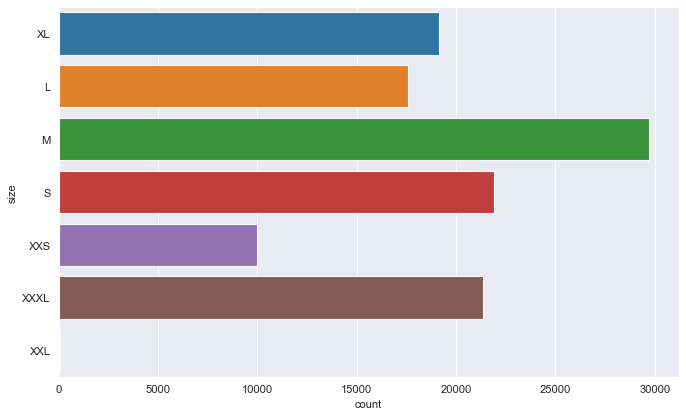

In [118]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(y=data["size"])
plt.show()

Index(['weight', 'age', 'height'], dtype='object')

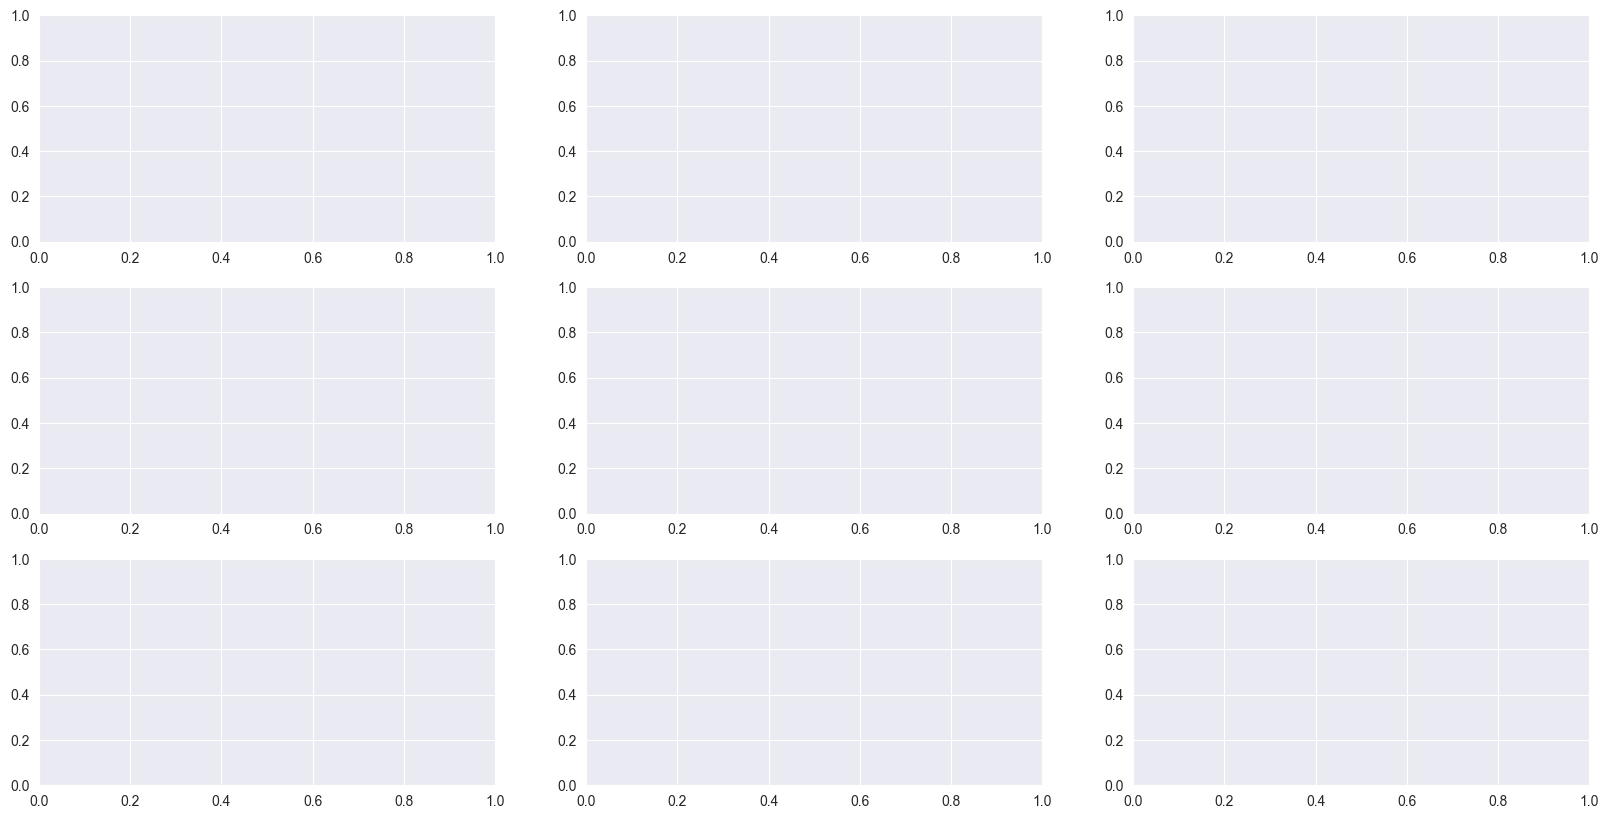

In [5]:
fig, axes = plt.subplots(figsize=(20, 10), nrows=3, ncols=3)

colors = ["#5bde54","#de5454", "#db53d5"]
data.columns[:-1]
# Histograms
col_no = 0
for col in data.columns[:-1]:
    sns.histplot(x=col, data=data, ax=axes[0, col_no], bins=20, color=colors[col_no])
    sns.kdeplot(x=col, data=data, ax=axes[1, col_no], color=colors[col_no])
    sns.boxplot(x=col, data=data, ax=axes[2, col_no], color=colors[col_no])
    col_no += 1

##### As You can observe from Box Plot there are a lot of outliers
##### Weight and Age of People is right skewed

In [146]:
data["size"].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

In [147]:
labels = list(data["size"].value_counts().index)
labels

['M', 'S', 'XXXL', 'XL', 'L', 'XXS', 'XXL']

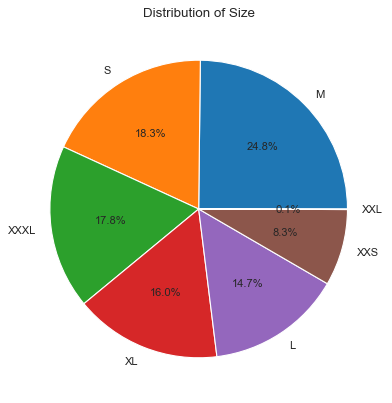

In [151]:
plt.figure(figsize=(6, 8), dpi=80)
plt.pie(data["size"].value_counts(), autopct='%.1f%%', labels=labels)
plt.title("Distribution of Size")
plt.show()

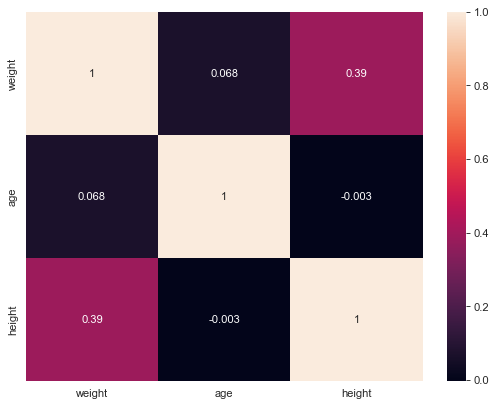

In [152]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(data.corr(), annot=True)
plt.show()

In [120]:
# Drop rows with missing values
data_step_one.dropna(inplace=True)
# Split the dataset into features (X) and target variable (y)
X = data_step_one[['weight', 'age', 'height']]
y = data_step_one["size"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [123]:
def decisionTreeRun(depth):
    # Create a Decision Tree Classifier
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

decisionTreeRun(None)

0.502162959947071

In [124]:
accuracy=[]
depths= list(range(2,100,3))
for depth in depths:
    accuracy.append(decisionTreeRun(depth))

accuracy

[0.4454934093338083,
 0.5072013842943661,
 0.5160822433711639,
 0.5131049926204896,
 0.5095424703547254,
 0.503893327904728,
 0.5024428724108098,
 0.5022392997099089,
 0.502162959947071,
 0.5021375133594584,
 0.5020102804213955,
 0.5020866201842333,
 0.5021884065346837,
 0.5022647462975215,
 0.5020866201842333,
 0.5023156394727467,
 0.502162959947071,
 0.5022647462975215,
 0.5022138531222963,
 0.5021375133594584,
 0.5020102804213955,
 0.5019339406585577,
 0.5023156394727467,
 0.5022392997099089,
 0.5022392997099089,
 0.5020357270090081,
 0.5020357270090081,
 0.5021884065346837,
 0.5020357270090081,
 0.5021884065346837,
 0.5022647462975215,
 0.5020866201842333,
 0.5020611735966207]

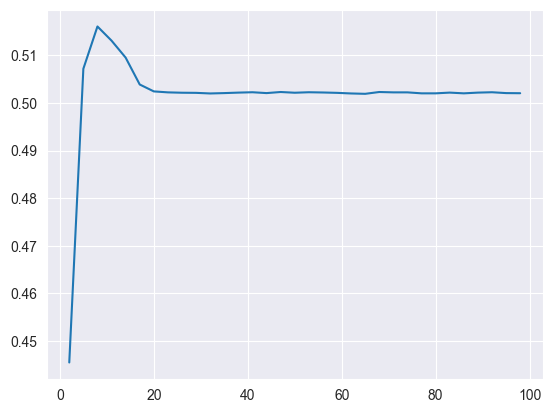

In [125]:
plt.plot(depths,accuracy)

In [68]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

results=pd.DataFrame(data={"Predictions":model.predict(X_test).tolist(),"Actuals":y_test.tolist()})
results["Matching"]=results.apply(lambda x:"Correct" if x["Predictions"]==x["Actuals"] else "Wrong",axis=1)
results

,Predictions,Actuals,Matching
0,S,S,Correct
1,M,M,Correct
2,XXS,XXS,Correct
3,M,XXXL,Wrong
4,M,M,Correct
...,...,...,...
39293,M,M,Correct
39294,M,L,Wrong
39295,M,XXS,Wrong
39296,M,M,Correct


In [96]:
# To access the columns, you need to convert the series back to a DataFrame: reset_index()

correct_Wrong_data=results.groupby(["Actuals","Matching"])["Predictions"].count().reset_index()

correct_Wrong_data["Labels"]=correct_Wrong_data["Actuals"]+"_"+correct_Wrong_data["Matching"]
correct_Wrong_data["Colors"]=correct_Wrong_data["Matching"].map(lambda x: 'b' if x=="Correct" else 'r')
# Using apply function 
# correct_Wrong_data["Colors"]=correct_Wrong_data["Matching"].apply(lambda x:'b' if x=="Correct" else 'r')
correct_Wrong_data

,Actuals,Matching,Predictions,Labels,Colors
0,L,Correct,1795,L_Correct,b
1,L,Wrong,3976,L_Wrong,r
2,M,Correct,5763,M_Correct,b
3,M,Wrong,3968,M_Wrong,r
4,S,Correct,3437,S_Correct,b
5,S,Wrong,3732,S_Wrong,r
6,XL,Correct,2506,XL_Correct,b
7,XL,Wrong,3872,XL_Wrong,r
8,XXS,Correct,1228,XXS_Correct,b
9,XXS,Wrong,2051,XXS_Wrong,r


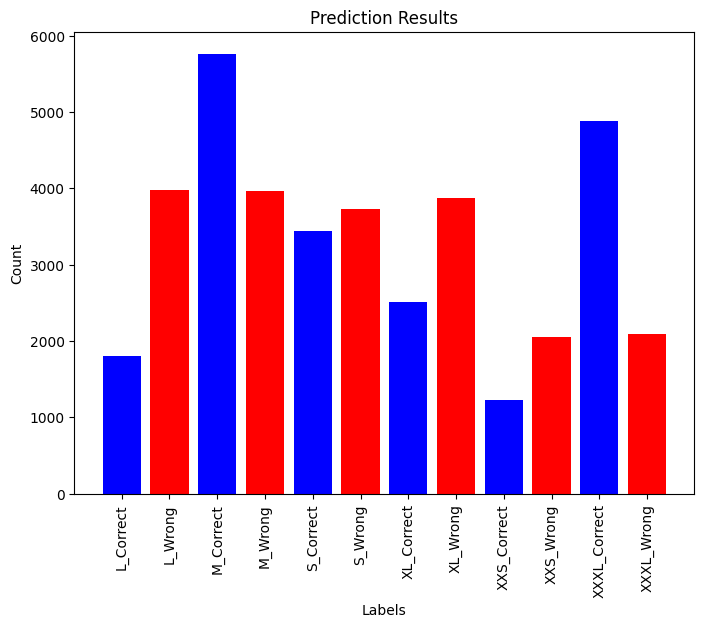

In [70]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(x=correct_Wrong_data["Labels"], height=correct_Wrong_data["Predictions"], color=correct_Wrong_data["Colors"])
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Prediction Results")
plt.xticks(rotation=90)
plt.show()

In [99]:
confusion_matrix(y_test,model.predict(X_test).tolist(),labels=y_test.unique())

array([[3437, 2535,  868,   24,  229,   76],
       [1761, 5763,  175,   99, 1367,  566],
       [1602,  396, 1228,    6,   39,    8],
       [  36,  236,    8, 4880,  405, 1405],
       [ 246, 2189,   16,  269, 1795, 1256],
       [ 137, 1157,    9, 1068, 1501, 2506]], dtype=int64)

c:\Users\Aryan.ABSALAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


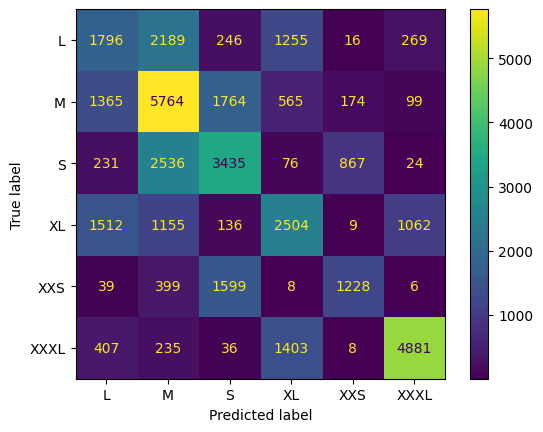

In [67]:
plot_confusion_matrix(model,X_test,y_test)

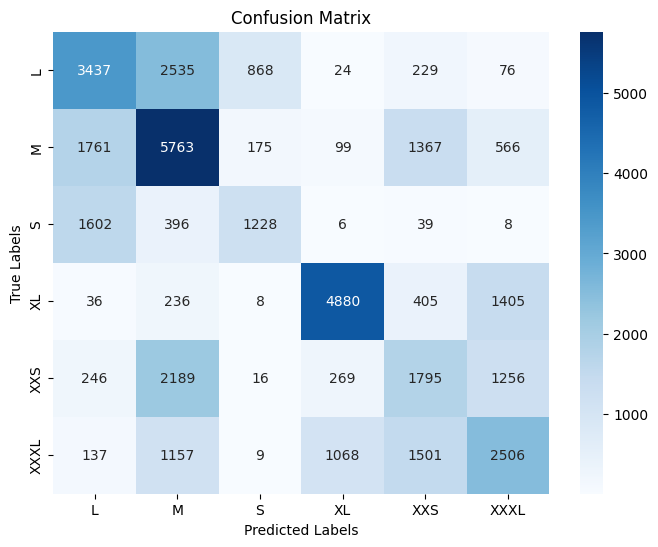

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
conf_matrix = confusion_matrix(y_test,model.predict(X_test).tolist(),labels=y_test.unique())

# Define the class labels
size_labels = correct_Wrong_data["Actuals"].unique()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=size_labels,
            yticklabels=size_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
